# Kungsholmen apartment price analysis during Covid-19

## Business understanding
I'm currently looking to buy an apartment on Kungsholmen, to help me in my search I want to answer a few questions about the state of the market.

**What does the Kungsholmen apartment market look like?**

What kinds of apartments are located in Kungsholmen? What is the most common size apartment? I'm interested to know this because I'm looking at apartments in the area. If the amount of available apartments that match my criteria is low, I might have to look elsewhere. For businesses this information may be interesting if any clear market segments can be identified.

**Did Covid-19 affect the market?**

Since we're currently living in the middle of a global pandemic I wanted to see if there were any evidence of the virus affecting apartment prices. This is useful to look into to try to determine if now is a good time to buy, or if I should wait until a vaccine comes along. 

There have been news reports of house prices accelerating during the past year as a result of the pandemic. I want to know if this is also true for apartments, and if so are there any patterns as to what types of apartments were affected? If the price of the exact type of apartment I'm looking skyrocketed in the past year, then maybe it might be an idea to postpone buying. Or maybe there any potential good deals to be made for a person that already owns an apartment.

**Can the final price of an apartment be estimated?**

It's difficult to come by unbiased advice on how to value apartments. As a buyer I can't really trust the broker, since the broker gets a higher commission if the price is higher. So estimating the price based on historical data is interesting when deciding what I'm willing to pay for an apartment.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from read_data import read_and_clean_apartment_data, read_covid_data
from scatter import price_scatter_plot

df = read_and_clean_apartment_data()
df_with_outliers = read_and_clean_apartment_data(remove_outliers=False)
uninteresting_columns = ['id', 'coordinate', 'typeSummary', 'iconName', 'formatted_price', 'sale_date', 'supplemental_area', 'url', 'land_area', 'broker_logo_url']

df.head()

,id,coordinate,address,typeSummary,iconName,location_name,price,formatted_price,price_per_area,fee,...,living_space,supplemental_area,url,land_area,formatted_price_change_percentage,broker_logo_url,fee_per_area,street_id,sale_datetime,street_attractiveness
0,1123282,"[59.33695736385066,18.025530244563154]","Svarvargatan 3, 2 tr",Bostadsrättslägenhet,bostadsratt,"Kungsholmen, Stockholm",3650000.0,Slutpris 3 650 000 kr,93590.0,1827.0,...,39.0,NaN,/salda/lagenhet-2rum-kungsholmen-fridhemsplan-...,NaN,NaN,https://bilder.hemnet.se/images/broker_logo_2/...,46.846154,svarvargatan,2020-08-03,0.635242
1,1139756,"[59.32892343420378,18.019346434686543]","Gjörwellsgatan 15, 1 trp",Bostadsrättslägenhet,bostadsratt,"Kungsholmen, Stockholm",4050000.0,Slutpris 4 050 000 kr,71303.0,3538.0,...,56.8,NaN,"/salda/lagenhet-2,5rum-marieberg-kungsholmen-s...",NaN,+10 %,https://bilder.hemnet.se/images/broker_logo_2/...,62.288732,gjrwellsgatan,2020-02-09,0.164939
2,1139783,"[59.327111962896275,18.009479044477448]",Atterbomsvägen 30,Bostadsrättslägenhet,bostadsratt,"Fredhäll, Stockholm",2500000.0,Slutpris 2 500 000 kr,100000.0,1452.0,...,25.0,NaN,/salda/lagenhet-1rum-kungsholmen-fredhall-stoc...,NaN,+25 %,https://bilder.hemnet.se/images/broker_logo_2/...,58.080000,atterbomsvgen,2020-02-09,0.495366
3,1139829,"[59.32885285266372,18.041304332706463]","Södra Agnegatan 20, 3tr",Bostadsrättslägenhet,bostadsratt,"Kungsholmen, Stockholm",7700000.0,Slutpris 7 700 000 kr,105479.0,1793.0,...,73.0,NaN,/salda/lagenhet-3rum-kungsholmen-stockholms-ko...,NaN,+14 %,https://bilder.hemnet.se/images/broker_logo_2/...,24.561644,sdraagnegatan,2020-02-09,0.845107
4,1139903,"[59.3264370094667,18.021165456974373]","Fyrverkarbacken 23, 3 tr",Bostadsrättslägenhet,bostadsratt,"Kungsholmen, Stockholm",2950000.0,Slutpris 2 950 000 kr,68605.0,2218.0,...,43.0,NaN,/salda/lagenhet-1rum-kungsholmen-stockholms-ko...,NaN,NaN,https://bilder.hemnet.se/images/broker_logo_2/...,51.581395,fyrverkarbacken,2020-02-09,0.247926


## Data understanding

I found price data for Kungsholmen from Hemnet, a website that lists properties for sale in Sweden. The prices were collected during the last 12 months. It includes date of sale and final price along with some information about the apartment, like for example address, size in square meters, number of rooms and fee.

In [3]:
print("Number of apartment prices:", len(df))
print("Mean price:", int(df_with_outliers.price_per_area.mean()), 'SEK/m²')
print("Standard deviation:", int(df_with_outliers.price_per_area.std()), 'SEK/m²')
print("Min price:", int(df_with_outliers.price_per_area.min()), 'SEK/m²')
print("Max price:", int(df_with_outliers.price_per_area.max()), 'SEK/m²')

Number of apartment prices: 2229
Mean price: 92319 SEK/m²
Standard deviation: 14173 SEK/m²
Min price: 45181 SEK/m²
Max price: 175000 SEK/m²


There are 2228 listings available, they were all collected during the last 12 months. This might seems like a low number of data points, but Kungsholmen is a small and quite homogeneous area so I don't believe this to be a problem.

The mean price in Kungsholmen is around 90 000 SEK per square meter, and the standard deviation is about 14 000 SEK/m². There is however some variation present, the lowest observed price is 45 181 SEK/m² and the highest 175 000 SEK/m². That is quite a range and something to be taken into consideration.

In [4]:
df.groupby('street_id').price_per_area.mean().astype(int).sort_values(ascending=False)

street_id
skillinggrnd          110398
parkgatan             108071
chapmansgatan         106165
kungsholmshamnplan    104330
kronobergsgatan       104199
                       ...  
geijersvgen            71537
wennerbergsgatan       71368
nicandervgen           70213
kristinebergsvgen      70099
runiusgatan            69481
Name: price_per_area, Length: 116, dtype: int64

As we can see above, the price varies significantly among different streets. Skillinggränd is for example a small and cozy street located close to Stockholm City Hall while Parkgatan is overlooking a beautiful park. Runiusgatan and Kristinebergsvägen both run along a highway. So these price differences make sense.

In [5]:
covid_df = read_covid_data()
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,datetime
58140,SWE,Europe,Sweden,2020-03-11,620.0,196.0,79.714,1.0,0.0,0.143,...,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,2020-03-11
58141,SWE,Europe,Sweden,2020-03-12,771.0,151.0,97.714,2.0,1.0,0.286,...,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,2020-03-12
58142,SWE,Europe,Sweden,2020-03-13,923.0,152.0,111.000,3.0,1.0,0.429,...,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,2020-03-13
58143,SWE,Europe,Sweden,2020-03-14,994.0,71.0,116.429,5.0,2.0,0.714,...,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,2020-03-14
58144,SWE,Europe,Sweden,2020-03-15,1063.0,69.0,119.714,7.0,2.0,1.000,...,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.8,0.933,2020-03-15


The covid data is more straightforward. There are case and death counts per day. Along with some stats for each Country. For comparing to price data, the total deaths is probably the most appropriate stat because it gives a clean metric of the development of the virus in Sweden. 

The total cases is of course also relevant, but this metric is also influenced by the amount of testing being done. It's for example possible that there was less testing going on in the beginning of the pandemic. The death count on the other hand is not influenced by the government's testing strategy.

## Data preparation

The data needed some cleaning up since the data was formatted to be displayed on a web page. The price, fee and size all had formatting, so they were stripped of characters other than digits.

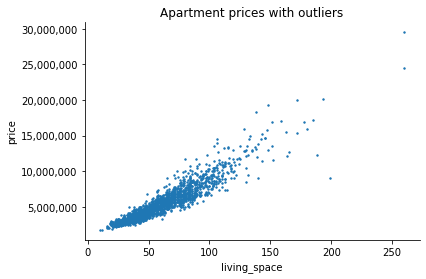

In [9]:
price_scatter_plot(df_with_outliers, xaxis='living_space', yaxis='price', title="Apartment prices with outliers")

**Outliers**

There's a few outliers among the largest and most expensive apartments. Most of the largest apartments still seem to follow the general trend in terms of price per square meter, but I'd definitely call the 200m² and the >250m² ones outliers. I decided to remove all apartments sold for more than 12 million SEK and larger than 120m².

As we can see below there are also two very small apartments, 10 and 12m² that are among the most expensive apartments per square meter. In fact the 10m² one is the most expensive apartment sold in the observed period. These are also removed.

In [7]:
df_with_outliers[df_with_outliers.living_space <= 15].drop(columns=uninteresting_columns)

,address,location_name,price,price_per_area,fee,asked_price,rooms,living_space,formatted_price_change_percentage,fee_per_area,street_id,sale_datetime,street_attractiveness
574,"Inedalsgatan 21, 3tr","Kungsholmen, Stockholm",1810000.0,150833.0,705.0,1795000.0,1.0,12.0,+1 %,58.75,inedalsgatan,2020-05-20,0.762970
2133,Sankt Eriksgatan 18,"Kungsholmen, Stockholm",1750000.0,175000.0,534.0,1495990.0,1.0,10.0,+17 %,53.40,sankteriksgatan,2021-01-18,0.763791


This is what the same scatter plot looks like with outliers removed.

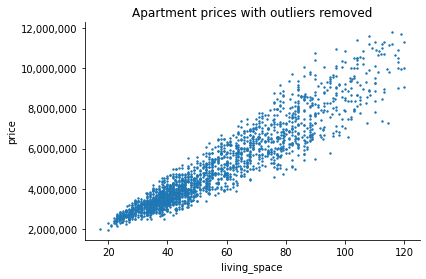

In [3]:
from read_data import clean_outliers
df_no_outliers = clean_outliers(df)
price_scatter_plot(df_no_outliers, xaxis='living_space', yaxis='price', title="Apartment prices with outliers removed")

**Taking street popularity into account**

As we saw earlier, price varies heavily for different streets. To be able to use data for individual streets, I defined street_id as the street name stripped of all non-letter characters. To get a metric of how popular a street is, street_attractiveness is created. Street attractiveness is the normalized mean of the price per square meter of the street. This way the more popular streets would get a street_attractiveness value closer to 1, and cheap streets would get a value close to 0. 

Streets could of course have been categorical values too, but I found this method of using the streets' mean price to be more accurate.

In [4]:
df.groupby('street_id').street_attractiveness.mean().sort_values(ascending=False)

street_id
chapmansgatan         1.000000
skillinggrnd          0.994901
kungsholmshamnplan    0.949975
parkgatan             0.874013
garvarlundinsgrnd     0.868024
                        ...   
wennerbergsgatan      0.075039
geijersvgen           0.056049
nicandervgen          0.019954
kristinebergsvgen     0.016860
runiusgatan           0.000000
Name: street_attractiveness, Length: 116, dtype: float64

There's an interesting outlying street found here. Wennerbergsgatan has both one of the lowest prices (54 918 SEK/m²) and one of the highest (132 813 SEK/m²), while the mean price of the street is around 72 000 SEK/m².

*Note: The attractiveness shown above is calculated with outliers removed, while the one below is calculated with outliers. We can see that Wennerbergsgatan had an attractiveness of ≈.12 with these outliers included, and ≈.075 with them excluded.*

In [22]:
# Calculate means for Wennerbergsgatan with and without outliers
print("Wennerbergsgatan mean price")
print(" with outliers:", int(df_with_outliers[df_with_outliers.street_id == 'wennerbergsgatan'].price_per_area.mean()), "SEK/m²")
print(" without outliers:", int(df[df.street_id == 'wennerbergsgatan'].price_per_area.mean()), "SEK/m²")

df_with_outliers[(df_with_outliers.street_id == 'wennerbergsgatan')].drop(columns=uninteresting_columns).sort_values(by='price_per_area', ascending=False).head()

Wennerbergsgatan mean price
 with outliers: 74293 SEK/m²
 without outliers: 72233 SEK/m²


,address,location_name,price,price_per_area,fee,asked_price,rooms,living_space,formatted_price_change_percentage,fee_per_area,street_id,sale_datetime,street_attractiveness
964,"Wennerbergsgatan 6B, 2 tr","Kungsholmen, Stockholm",2125000.0,132813.0,893.0,1795000.0,1.0,16.0,+18 %,55.812500,wennerbergsgatan,2020-08-10,0.117625
753,"Wennerbergsgatan 2, entréplan","Kungsholmen, Stockholm",2640000.0,82500.0,2031.0,1850000.0,1.0,32.0,+43 %,63.468750,wennerbergsgatan,2020-06-18,0.117625
747,Wennerbergsgatan 2A,"Kungsholmen, Stockholm",2675000.0,78676.0,2125.0,1995000.0,2.0,34.0,+34 %,62.500000,wennerbergsgatan,2020-06-17,0.117625
1796,"Wennerbergsgatan 6A, 2tr","Kungsholmen, Stockholm",3650000.0,77660.0,2511.0,3250000.0,2.0,47.0,+12 %,53.425532,wennerbergsgatan,2020-11-16,0.117625
418,"Wennerbergsgatan 6A, 6 tr","Kungsholmen, Stockholm",3600000.0,76596.0,2623.0,3495000.0,2.0,47.0,+3 %,55.808511,wennerbergsgatan,2020-04-23,0.117625


One caveat to this approach may be that prices could vary heavily along very long streets, for example one that starts in a green area ends up going across a heavily trafficked crossroad. But attractiveness and popularity is of course much more complex than just the mean price anyway, if I had access to more complete data about the apartments I would have wanted to delve deeper into determining popularity. But considering the data available I think this street_attractiveness metric is the best bet.

## Data analysis and modeling

### What does the Kungsholmen apartment market look like?


<AxesSubplot:ylabel='rooms'>

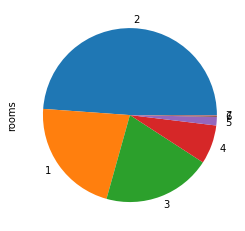

In [32]:
df_with_outliers.rooms.value_counts().sort_values(ascending=False).plot(kind = 'pie')

Half of the apartments sold last year were 2 room apartments. About one quarter 1 room, and one quarter 3 rooms. So it makes sense that many outliers were found among the largest apartments.

*Note: the plot above includes outliers.*

Here's a look at the average sizes of apartments. There's nothing out of the ordinary going on here.

<AxesSubplot:xlabel='rooms', ylabel='Mean size (m²)'>

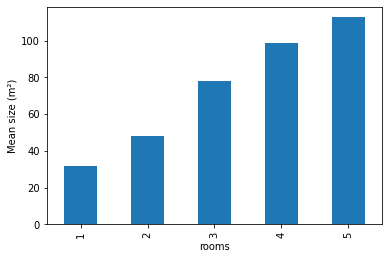

In [35]:
df.groupby('rooms').living_space.mean().plot.bar(ylabel="Mean size (m²)")

<AxesSubplot:xlabel='rooms', ylabel='Mean size (m²)'>

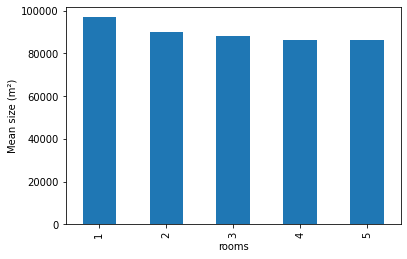

In [34]:
df.groupby('rooms').price_per_area.mean().plot.bar(ylabel="Mean size (m²)")

Buying a square meter of a smaller apartment is slightly more expensive than in a larger one, but not by a lot. It makes sense since Kungsholmen is part of Stockholm city. Many younger single persons who want to live in the city but can't afford a 2 room apartment are probably willing to pay a high price for a smaller 1 room apartment.

### Did Covid-19 affect the market?

Here's a look at how Kungsholmen apartments faired during the last 12 months, along with Sweden's total covid deaths.

Price change: 3 %


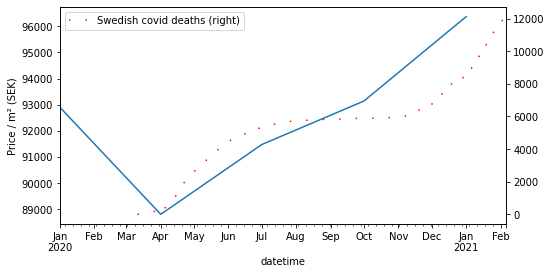

In [17]:
# i wanted to keep the notebook clean, so the bulk of the code is in other files
# look in price_vs_covid.py for more comments on the code
from price_vs_covid import plot_apartment_price_vs_covid_deaths
plot_apartment_price_vs_covid_deaths(df)

So it certainly seems like the market was chocked when the pandemic started to spread to Sweden. Quite interestingly the mean price recovered quickly and ended the year 3% higher than it started.


It is however not really possible to draw any conclusions looking at a single year. The price drop could be a seasonal effect that happened to coincide with covid in 2020.

To look at a longer timefrime I found monthly average prices for all of Stockholm for the last 36 months.

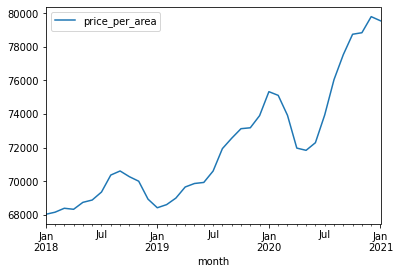

In [19]:
stockholm_df = pd.read_csv('./datasets/broker_prices_36_month.csv')
stockholm_df['month'] = pd.to_datetime(stockholm_df['Månad'])
stockholm_df['price_per_area'] = stockholm_df['kr/kvm']

stockholm_df.plot(x='month', y="price_per_area")
plt.show()

There's no noticable seasonal effect, at least during the last 3 years. However we can see a price drop in 2018 similar to the one in early 2020. The 2020 price drop *looks* steeper and I'd say it's rather probable that covid-19 *did* cause it, but it could just aswell be normal market behavior.

But let's take a look at different sized apartments.

0 to 25 m² - Price Q1 2020: 121662 SEK/m², Price Q1 2021: 109619 SEK/m², Change: -9.9 %
26 to 50 m² - Price Q1 2020: 93740 SEK/m², Price Q1 2021: 97367 SEK/m², Change: 3.9 %
51 to 120 m² - Price Q1 2020: 88267 SEK/m², Price Q1 2021: 92376 SEK/m², Change: 4.7 %


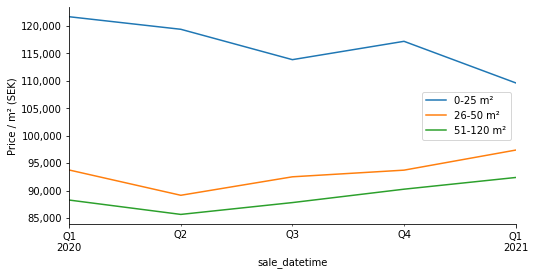

In [16]:
from size_vs_covid import plot_price_timeline_for_apartment_sizes
plot_price_timeline_for_apartment_sizes(df)

Prices of the very smallest apartments (<25 m²) decreased by 10% during the last 12 months even though prices as a whole rose by around 3%. This suggests an interesting effect covid may have had on Kungsholmen apartment prices: The smallest apartments may have become less attractive during the pandemic.

### Can the final price of an apartment be estimated?

As stated earlier I'm currently looking for an apartment in this area, so I'd like to try and predict prices for the apartments I'm viewing. I mean I have to make sure I don't pay way too much! :)

Probably the most obvious feature that affects price is the size of the apartment.

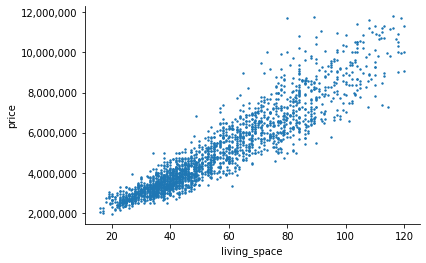

In [7]:
price_scatter_plot(df, xaxis='living_space', yaxis='price')

There's a clear correlation between size and price in the plot above.

Another obvious feature is location. As discussed above I defined street_attractiveness as the normalized mean price per square meter of the street.

I think this is an alright way to factor in location as it will take into account that two streets may have very different prices even though they are geographically close. An example could be two parallell streets where one street faces a river, while the other faces a heavily trafficked street.

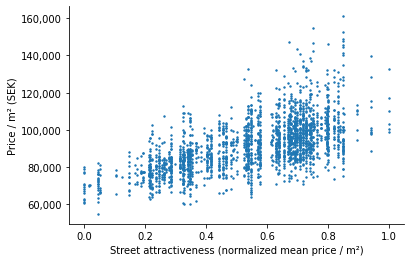

In [21]:
price_scatter_plot(df, xaxis="street_attractiveness", yaxis="price_per_area", xlabel="Street attractiveness (normalized mean price / m²)", ylabel="Price / m² (SEK)")

We can see there's a noticable correlation between streets and price.

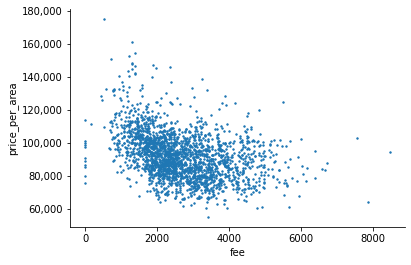

In [17]:
price_scatter_plot(df, xaxis='fee', yaxis='price_per_area')

The fee negatively correlates to price per square meter. That seems reasonable considering a higher fee means the cost of living increases, which impacts the size of the mortage you're able to get. The fee also covers loans on the building, so a high fee often means high debt which of course would lower the valuation of the apartments in the building.

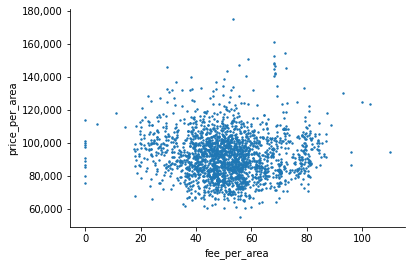

In [18]:
price_scatter_plot(df, xaxis='fee_per_area', yaxis='price_per_area')

At first I considered using fee / size, since that seems like a better comparison between different sized apartments. But it turns out the correlation is gone, or at least much weaker when accounting for size. But I guess it makes sense that the full amount is what matters, since that is the input into the bank's mortage calculation.

**Regression**

So here's a linear regression using living_space, street_attractiveness and fee to estimate price.

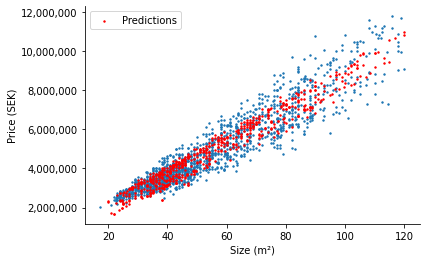

In [2]:
from predict import plot_regression

plot_regression(df)

In [8]:
from predict import evaluate_model
r2score, rmse = evaluate_model(df)
print('R2-score:', round(r2score, 3))
print("Mean squared error:", int(rmse))
print("Root of mean squared error / mean size:",int(rmse/df.living_space.mean()))

R2-score: 0.932
Mean squared error: 523717
Root of mean squared error / mean size: 9590


The R2-score is .93, that's not terrible. 

The root of the mean squared error is around 520 000, that seems rather high at first glance. But considering the predicted values range from around 2 million to 12 million, it seems alright. 

I also figured I'd divide the RMSE by the mean apartment size to get an estimate of the error of the price per square meter, it's around 10 000. Price per square meter range from 60 000 to 120 000, so 10 000 feels okay.

Here's few very recent sales that are not included in the data:

In [11]:
from predict import predict

print("Pipersgatan 18 Predicted price:", predict(df, "Pipersgatan 18", 37.5, 3062), ', Actual price: 3750000 SEK')
print("Vitalisvägen 4 Predicted price:", predict(df, "Vitalisvägen 4", 43, 2335), ', Actual price: 3630000 SEK')
print("Inedalsgatan 15 Predicted price:", predict(df, "Inedalsgatan 15", 23, 1623), ', Actual price: 3150000 SEK')
print("Frödingsvägen 6 Predicted price:", predict(df, "Frödingsvägen 6", 53, 2161), ', Actual price: 4300000 SEK')
print("Ivan Oljelunds Gränd 1 Predicted price:", predict(df, "Ivan Oljelunds Gränd 1", 87, 4680), ', Actual price: 8150000 SEK')

Pipersgatan 18 Predicted price: 3828957 , Actual price: 3750000 SEK
Vitalisvägen 4 Predicted price: 3388834 , Actual price: 3630000 SEK
Inedalsgatan 15 Predicted price: 2354597 , Actual price: 3150000 SEK
Frödingsvägen 6 Predicted price: 4572268 , Actual price: 4300000 SEK
Ivan Oljelunds Gränd 1 Predicted price: 7643949 , Actual price: 8150000 SEK


That's actually not too bad considering the data the model is based on. But we can also see that Inedalsgatan 15 was off by 800 000 SEK so it may not be very reliable.

## Results evaluation

One huge caveat I didn't address yet: The data used to create the regression was all collected during 2020, the year of covid-19, and as we saw earlier the housing market was certainly affected by the pandemic. Creating a model using data from a very volatile year is maybe not the best idea. But at the same time, what other data could you use? The vaccine is yet to come, so we're still in the middle of the pandemic, which means we don't know if the changes observed will persist or if the market will return to normal.

The affect covid had on the market as a whole was not very severe and does not seem to have had an effect greater than what can be considered normal market behavior.

## Conclusion

**What does the Kungsholmen apartment market look like?** Kungsholmen consists of mostly smaller apartments. About half of the apartments have only 2 rooms, and a quarter are 1-room apartments. These small sized apartments are probably not large enough for families, so a safe bet is that most of the people living in Kungsholmen are single or young couples. This may also be reflected in the prices as smaller sized apartments are more expensive (per square meter) than larger ones.

**Did Covid-19 affect the market?** Apartment prices on Kungsholmen were probably affected by the Covid-19 pandemic. There seems to have been a brief chock to prices during the initial phase of the spread of the virus. A closer look at different sized apartments suggests that very small apartments took a more severe hit as prices did not recover during 2020.

**Can the final price of apartments be estimated?** Predicting the price of future apartments proves difficult considering the available data and the market volatility, but the regression model developed can at least help in giving a price indication.